In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Training Workshop Part III

## 7. Data Visualization

#### Read Dataframe with time information

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
# plot graphs inside notebook

In [8]:
# plot s&p 500 stock price
sp = pd.read_csv('GSPC.csv', index_col=0, parse_dates=True)

In [9]:
# Date as index and converted to date type
sp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-10,1118.380005,1125.260010,1114.390015,1123.920044,1123.920044,1261200000
2004-09-13,1123.920044,1129.780029,1123.349976,1125.819946,1125.819946,1299800000
2004-09-14,1125.819946,1129.459961,1124.719971,1128.329956,1128.329956,1204500000
2004-09-15,1128.329956,1128.329956,1119.819946,1120.369995,1120.369995,1256000000
2004-09-16,1120.369995,1126.060059,1120.369995,1123.500000,1123.500000,1113900000


In [10]:
sp.index

DatetimeIndex(['2004-09-10', '2004-09-13', '2004-09-14', '2004-09-15',
               '2004-09-16', '2004-09-17', '2004-09-20', '2004-09-21',
               '2004-09-22', '2004-09-23',
               ...
               '2019-08-27', '2019-08-28', '2019-08-29', '2019-08-30',
               '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06',
               '2019-09-09', '2019-09-10'],
              dtype='datetime64[ns]', name='Date', length=3776, freq=None)

In [11]:
# load data directly and convert string to datetime
raw_sp = pd.read_csv('GSPC.csv')
raw_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3776 entries, 0 to 3775
Data columns (total 7 columns):
Date         3776 non-null object
Open         3776 non-null float64
High         3776 non-null float64
Low          3776 non-null float64
Close        3776 non-null float64
Adj Close    3776 non-null float64
Volume       3776 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 206.6+ KB


In [12]:
raw_sp['Date'] = pd.to_datetime(raw_sp['Date']) # replaced Date column
raw_sp.set_index('Date', inplace=True)
raw_sp.index

DatetimeIndex(['2004-09-10', '2004-09-13', '2004-09-14', '2004-09-15',
               '2004-09-16', '2004-09-17', '2004-09-20', '2004-09-21',
               '2004-09-22', '2004-09-23',
               ...
               '2019-08-27', '2019-08-28', '2019-08-29', '2019-08-30',
               '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06',
               '2019-09-09', '2019-09-10'],
              dtype='datetime64[ns]', name='Date', length=3776, freq=None)

In [13]:
# generate a datetime index
pd.date_range(pd.Timestamp("2018-03-10"), periods=21, freq='d')

DatetimeIndex(['2018-03-10', '2018-03-11', '2018-03-12', '2018-03-13',
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-17',
               '2018-03-18', '2018-03-19', '2018-03-20', '2018-03-21',
               '2018-03-22', '2018-03-23', '2018-03-24', '2018-03-25',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
               '2018-03-30'],
              dtype='datetime64[ns]', freq='D')

In [14]:
# convert datetime to string
raw_sp.index.strftime('%Y-%m-%d')

Index(['2004-09-10', '2004-09-13', '2004-09-14', '2004-09-15', '2004-09-16',
       '2004-09-17', '2004-09-20', '2004-09-21', '2004-09-22', '2004-09-23',
       ...
       '2019-08-27', '2019-08-28', '2019-08-29', '2019-08-30', '2019-09-03',
       '2019-09-04', '2019-09-05', '2019-09-06', '2019-09-09', '2019-09-10'],
      dtype='object', length=3776)

#### Resample Function on Datetime

In [15]:
# resample yearly to aggreate
raw_sp.resample('Y').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,1153.076711,1158.516339,1148.984936,1154.262154,1154.262154,1.428949e+09
2005-12-31,1207.087063,1212.572896,1202.005837,1207.229443,1207.229443,1.919904e+09
2006-12-31,1309.762590,1315.611637,1304.494979,1310.461236,1310.461236,2.394513e+09
2007-12-31,1476.958364,1485.241034,1467.946455,1477.184342,1477.184342,3.227438e+09
2008-12-31,1222.026956,1235.699725,1204.980832,1220.042056,1220.042056,5.033223e+09
2009-12-31,947.022063,956.346349,938.286864,948.046388,948.046388,5.573208e+09
2010-12-31,1139.369761,1146.573372,1131.280990,1139.965512,1139.965512,4.569371e+09
2011-12-31,1267.618211,1277.223450,1257.176747,1267.638809,1267.638809,4.109056e+09
2012-12-31,1378.680638,1385.845401,1371.269002,1379.354160,1379.354160,3.631677e+09


In [16]:
# date is still timestamp format, but we need year only
raw_sp.resample('Y',kind='period').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004,1153.076711,1158.516339,1148.984936,1154.262154,1154.262154,1.428949e+09
2005,1207.087063,1212.572896,1202.005837,1207.229443,1207.229443,1.919904e+09
2006,1309.762590,1315.611637,1304.494979,1310.461236,1310.461236,2.394513e+09
2007,1476.958364,1485.241034,1467.946455,1477.184342,1477.184342,3.227438e+09
2008,1222.026956,1235.699725,1204.980832,1220.042056,1220.042056,5.033223e+09
2009,947.022063,956.346349,938.286864,948.046388,948.046388,5.573208e+09
2010,1139.369761,1146.573372,1131.280990,1139.965512,1139.965512,4.569371e+09
2011,1267.618211,1277.223450,1257.176747,1267.638809,1267.638809,4.109056e+09
2012,1378.680638,1385.845401,1371.269002,1379.354160,1379.354160,3.631677e+09


In [17]:
# now becomes period index
raw_sp.resample('Y',kind='period').mean().index

PeriodIndex(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
             '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
            dtype='period[A-DEC]', name='Date', freq='A-DEC')

In [18]:
# a complete resample logic
year_sp = pd.DataFrame()
year_sp['Open'] = raw_sp.Open.resample('Y').first()
year_sp['High'] = raw_sp.High.resample('Y').max()
year_sp['Low'] = raw_sp.Low.resample('Y').min()
year_sp['Close'] = raw_sp.Close.resample('Y').last()
year_sp['Volume'] = raw_sp.Volume.resample('Y').sum()

In [19]:
year_sp.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-12-31,1118.380005,1217.329956,1090.290039,1211.920044,112886980000
2005-12-31,1211.920044,1275.800049,1136.150024,1248.290039,483815720000
2006-12-31,1248.290039,1431.810059,1219.290039,1418.300049,601022760000
2007-12-31,1418.030029,1576.089966,1363.979980,1468.359985,810086850000
2008-12-31,1467.969971,1471.770020,741.020020,903.250000,1273405400000


#### start to plot

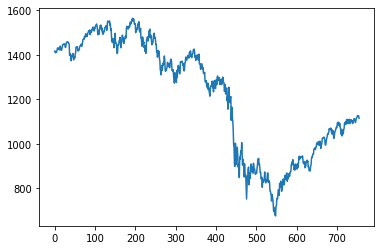

In [20]:
spx = sp.loc['2007-01-01':'2009-12-31',['Adj Close']]
spx.sort_index()
# if plot only contains y values, then x values will automatically be the range start from 0
plt.plot(spx.values)
plt.show()

#### plot adjustment

##### Figure Configuration

In [21]:
# some pre-defined
r_hex = '#dc2624'    # red, RGB = 220,38,36
dt_hex = '#2b4750'   # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'   # teal, RGB = 69,160,162
r1_hex = '#e87a59'   # red,  RGB = 232,122,89
tl1_hex = '#7dcaa9'  # teal, RGB = 125,202,169
g_hex = '#649E7D'    # green, RGB = 100,158,125
o_hex = '#dc8018'    # orange, RGB = 220,128,24
tn_hex = '#C89F91'   # tan, RGB = 200,159,145
g50_hex = '#6c6d6c'  # grey-50, RGB = 108,109,108 
bg_hex = '#4f6268'   # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'  # grey-25, RGB = 199,204,207

figure size: [6.0, 4.0]
figure dpi: 72.0
line color: C0
line style: -
line width: 1.5
xticks: [-100.    0.  100.  200.  300.  400.  500.  600.  700.  800.]
yticks: [ 600.  800. 1000. 1200. 1400. 1600. 1800.]


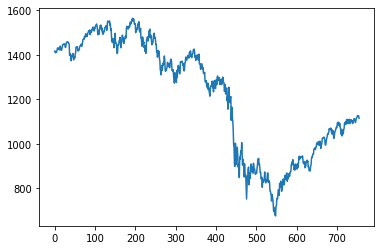

In [22]:
# print some of the properties of the plot
print( 'figure size:', plt.rcParams['figure.figsize'] )
print( 'figure dpi:',plt.rcParams['figure.dpi'] )
print( 'line color:',plt.rcParams['lines.color'] ) 
print( 'line style:',plt.rcParams['lines.linestyle'] ) 
print( 'line width:',plt.rcParams['lines.linewidth'] )
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.plot( spx['Adj Close'].values )
print( 'xticks:', ax.get_xticks() ) 
print( 'yticks:', ax.get_yticks() ) 

###### Enlarge Size

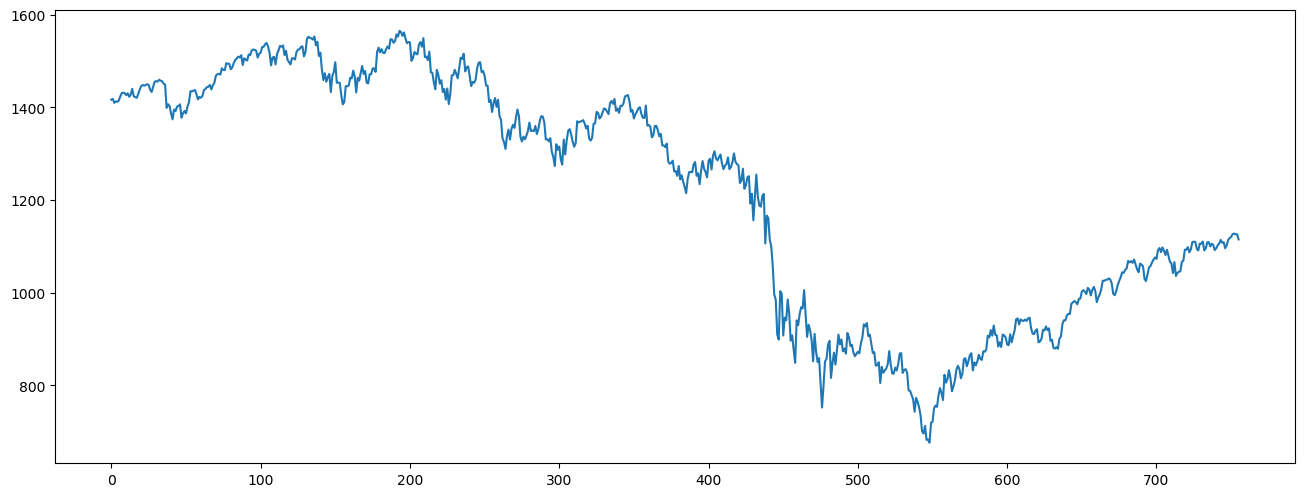

In [23]:
# create a figure of size 16*6 points using 100 dots per inch
plt.figure(figsize=(16,6), dpi=100)
plt.plot(spx.values)
plt.show()

###### change line color, width and style

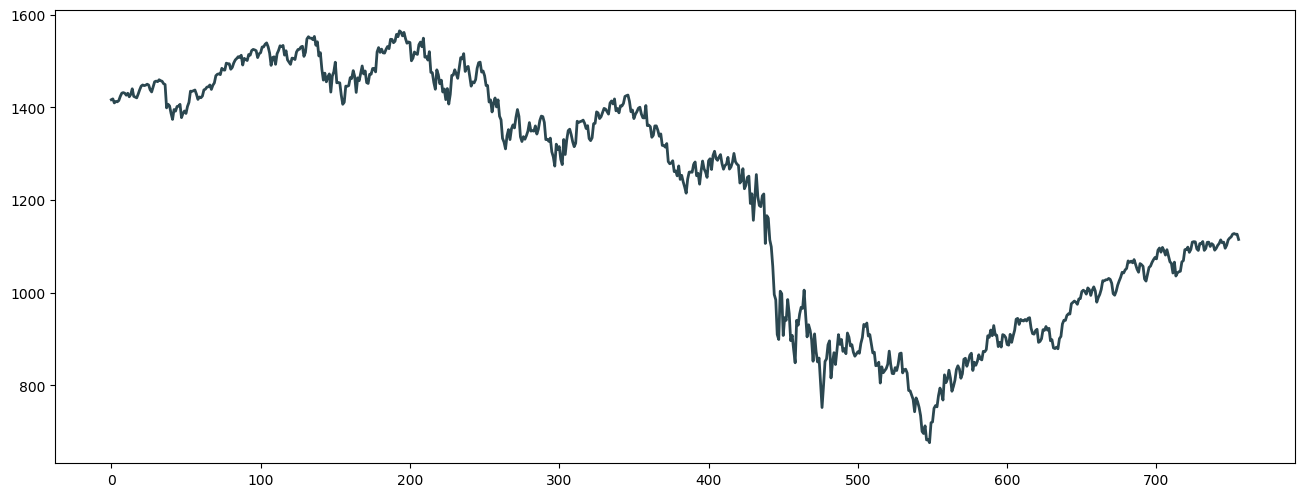

In [24]:
plt.figure( figsize=(16,6), dpi=100 )
plt.plot( spx.values, color=dt_hex, linewidth=2, linestyle='-' )
plt.show()

######  set plot boundaries

C:\Users\Hank Bot\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


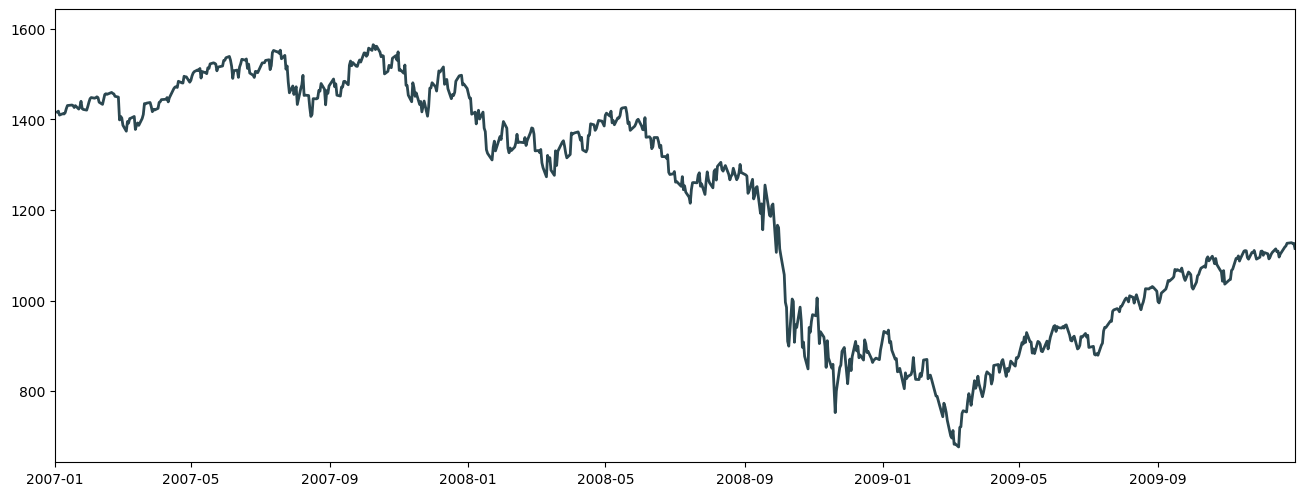

In [25]:
# a figure can contain multiple plots
# to control x/y axis, need to add an ax to the figure
fig = plt.figure( figsize=(16,6), dpi=100 )
# subplot (row, col, position)
ax = fig.add_subplot(1,1,1)
# x is an index object! make dataframe natrually tailored to plot
# think of using numpy.ndarray to plot - need to set up x and y separately
x = spx.index
y = spx.values
plt.plot(x, y, color=dt_hex, linewidth=2, linestyle='-' )
ax.set_xlim('2007-01-01','2009-12-31')
ax.set_ylim(y.min()*0.95, y.max()*1.05)
plt.show()

### <font color='red'> issues: x axis does not have day, and too sparse </font>

######  set up ticks and tick labels

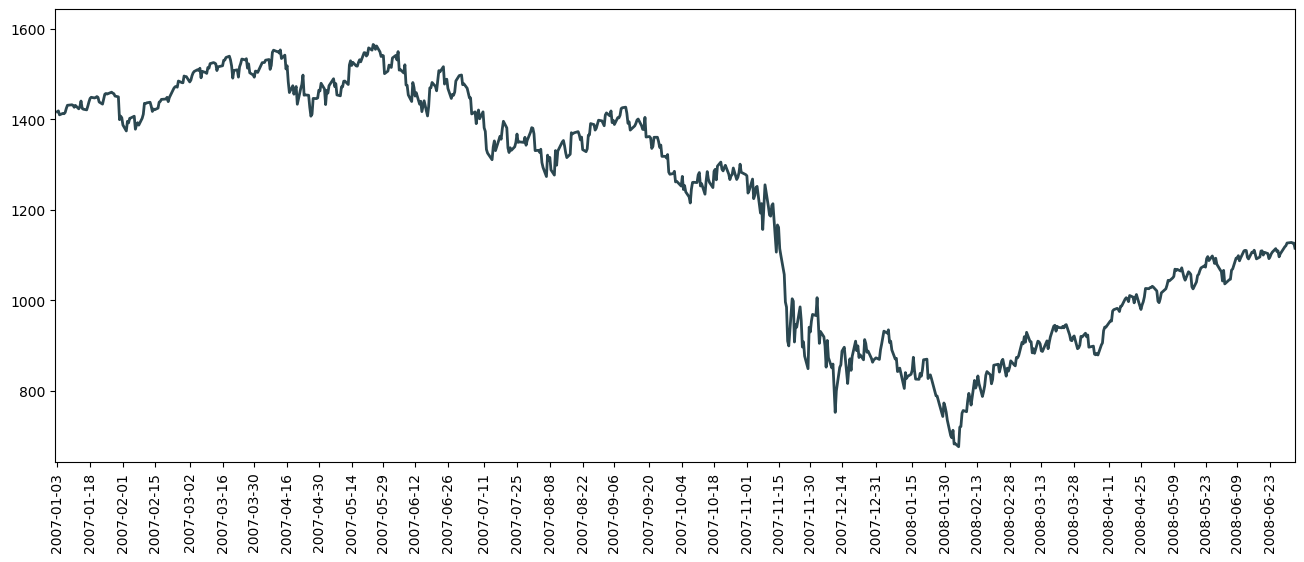

In [26]:
# set figure size and line style
fig = plt.figure( figsize=(16,6), dpi=100 )
ax = fig.add_subplot(1,1,1)
x = spx.index
y = spx.values
plt.plot(x, y, color=dt_hex, linewidth=2, linestyle='-' )

# set up x/y limit
ax.set_xlim('2007-01-01','2009-12-31')
ax.set_ylim(y.min()*0.95, y.max()*1.05)

# set up ticks and tick label
ax.set_xticks(x[range(0,len(x),20)])
# iteration to generate list (recall list generation from class 1)
# strftime convert a datetime format to string
ax.set_xticklabels([x[i].strftime('%Y-%m-%d') for i in range(0,len(x),10)], rotation=90)
plt.show()

###### add legend

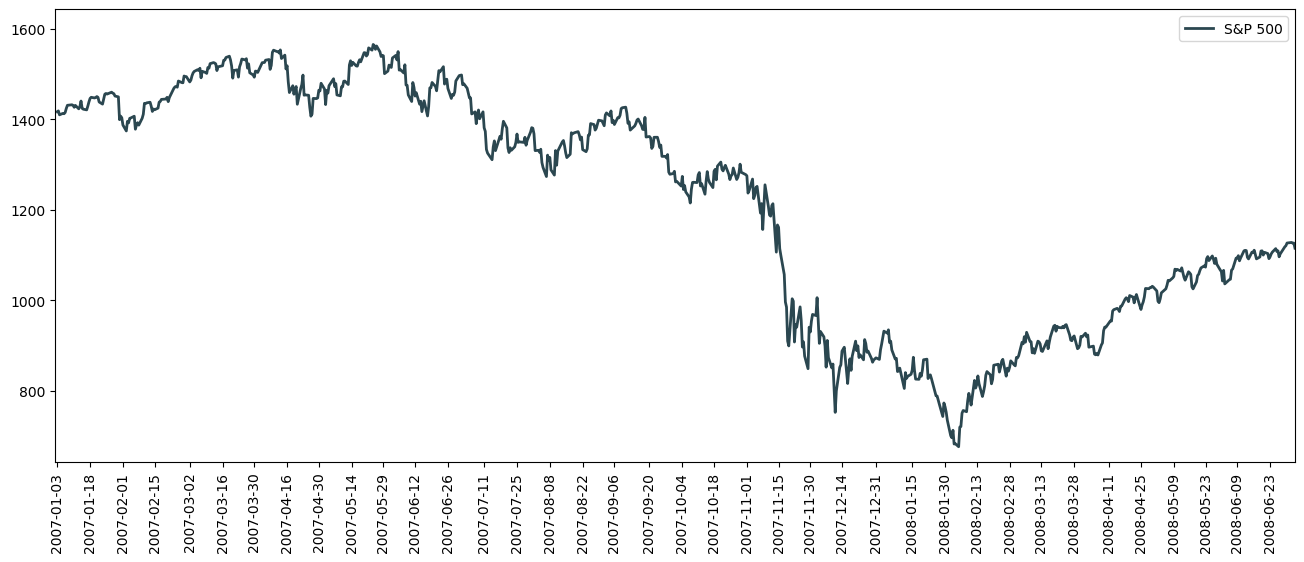

In [27]:
# set figure size and line style
fig = plt.figure( figsize=(16,6), dpi=100 )
ax = fig.add_subplot(1,1,1)
x = spx.index
y = spx.values
# need to give plot a label in order to display legend
plt.plot(x, y, color=dt_hex, linewidth=2, linestyle='-', label='S&P 500')

# set up x/y limit
ax.set_xlim('2007-01-01','2009-12-31')
ax.set_ylim(y.min()*0.95, y.max()*1.05)

# add legend
ax.legend(loc=0)

# set up ticks and tick label
ax.set_xticks(x[range(0,len(x),20)])
ax.set_xticklabels([x[i].strftime('%Y-%m-%d') for i in range(0,len(x),10)], rotation=90)
plt.show()

##### add a second plot

In [28]:
# import VIX data
data = pd.read_csv( 'vixcurrent.csv', index_col=0, parse_dates=True)
vix = data.loc['2007-01-01':'2009-12-31', ['VIX Close']]

In [29]:
vix.head()

,VIX Close
Date,
2007-01-03,12.04
2007-01-04,11.51
2007-01-05,12.14
2007-01-08,12.00
2007-01-09,11.91


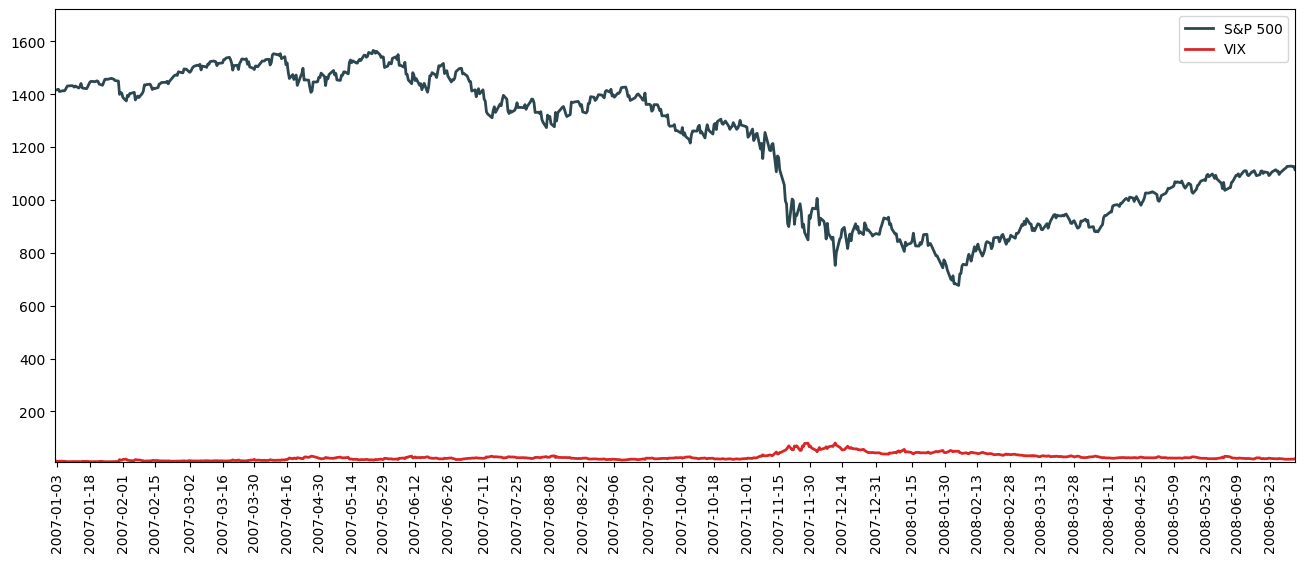

In [30]:
# set figure size and line style
fig = plt.figure( figsize=(16,6), dpi=100 )
ax = fig.add_subplot(1,1,1)
x = spx.index
y1 = spx.values
y2 = vix.values
# need to give plot a label in order to display legend
plt.plot(x, y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P 500')
plt.plot(x, y2, color=r_hex, linewidth=2, linestyle='-', label='VIX')


# set up x/y limit
ax.set_xlim('2007-01-01','2009-12-31')
# np.vstack stacks two ndarray vertically (recall from class 1)
ax.set_ylim(np.vstack([y1,y2]).min()*0.9, np.vstack([y1,y2]).max()*1.1)

# add legend
ax.legend(loc=0)

# set up ticks and tick label
ax.set_xticks(x[range(0,len(x),20)])
ax.set_xticklabels([x[i].strftime('%Y-%m-%d') for i in range(0,len(x),10)], rotation=90)
plt.show()

### <font color='red'> issue: the measure of VIX and S&P 500 is different </font>

###### two axis

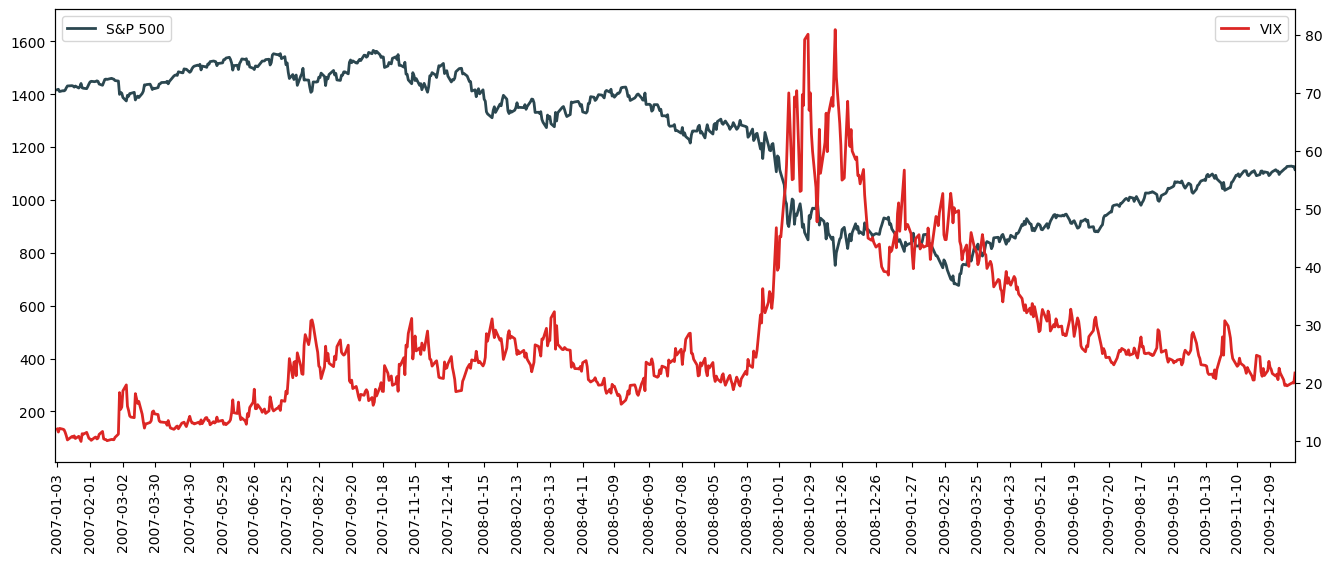

In [31]:
# set figure size and line style
fig = plt.figure( figsize=(16,6), dpi=100 )
ax = fig.add_subplot(1,1,1)
x = spx.index
y1 = spx.values
y2 = vix.values
# need to give plot a label in order to display legend
# ax.plot and plt.plot is exchangeable
ax.plot(x, y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P 500')


# set up x/y limit
ax.set_xlim('2007-01-01','2009-12-31')
# np.vstack stacks two ndarray vertically (recall from class 1)
ax.set_ylim(np.vstack([y1,y2]).min()*0.9, np.vstack([y1,y2]).max()*1.1)

# add legend
ax.legend(loc='upper left')

# set up another axis
ax2 = ax.twinx()
ax2.plot(x, y2, color=r_hex, linewidth=2, linestyle='-', label='VIX')
ax2.legend(loc='upper right')

# set up ticks and tick label
xticks = x[range(0,len(x),20)]
ax.set_xticks(xticks)
ax.set_xticklabels([i.strftime('%Y-%m-%d') for i in xticks], rotation=90)

plt.show()

##### two subplots

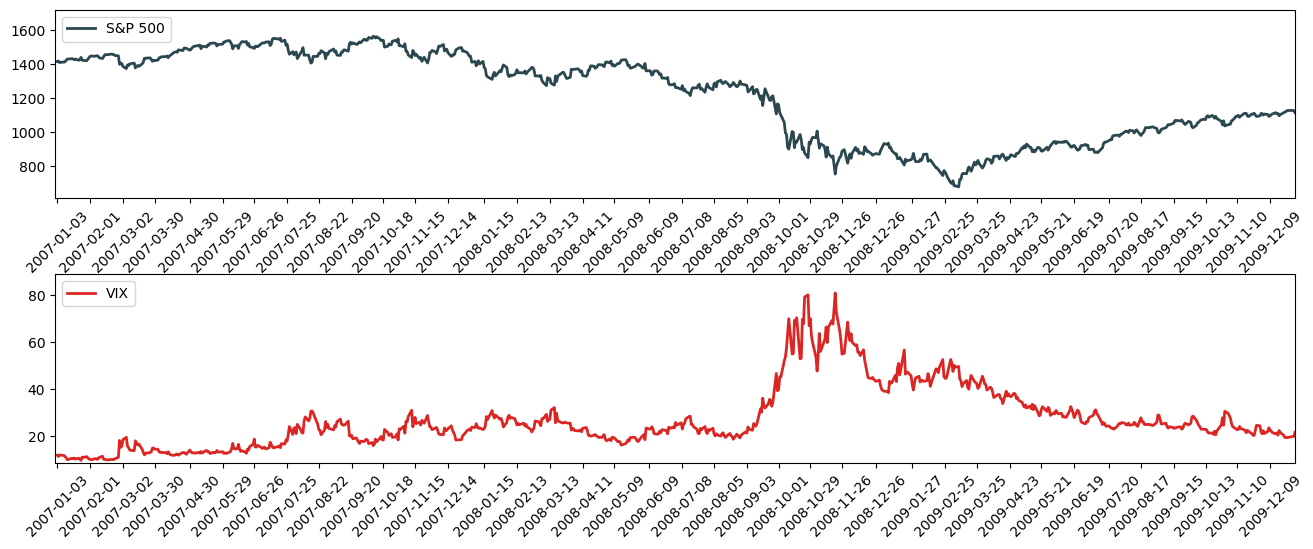

In [32]:
# set figure size and line style
fig = plt.figure( figsize=(16,6), dpi=100 )


# subplot 1, two rows 1 column
plt.subplot(2,1,1)
x = spx.index
y1 = spx.values
plt.plot(x, y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P 500')

xticks = x[range(0,len(x),20)]
xlabels = [i.strftime('%Y-%m-%d') for i in xticks]

# axis and plt have slightly different grammar

plt.xlim('2007-01-01','2009-12-31')
plt.ylim(y1.min()*0.9, y1.max()*1.1)
plt.legend(loc='upper left')
plt.xticks(xticks, xlabels, rotation=45)


# subplot 2
plt.subplot(2,1,2)
y2 = vix.values
plt.plot(x, y2, color=r_hex, linewidth=2, linestyle='-', label='VIX')
# axis and plt have slightly different grammar
plt.xlim('2007-01-01','2009-12-31')
plt.ylim(y2.min()*0.9, y2.max()*1.1)
plt.legend(loc='upper left')
plt.xticks(xticks, xlabels, rotation=45)

# adjust space between two plots
plt.subplots_adjust(hspace=0.4)
plt.show()

##### annotations

In [33]:
# annotate following 5 incidents on the plot
# 2007-10-11: peak of bull market
# 2008-03-12: Bear Stearns collapse
# 2008-09-15: Lehman Brothers collapse
# 2009-01-20: RBS sell-off
# 2009-04-02: G20 summit

2007-10-11 00:00:00 Peak of Bull Market
2008-03-12 00:00:00 Bear Stearns Collapse
2008-09-15 00:00:00 Lehman Brothers Collapse
2009-01-20 00:00:00 RBS Sell-off
2009-04-02 00:00:00 G20 Summit


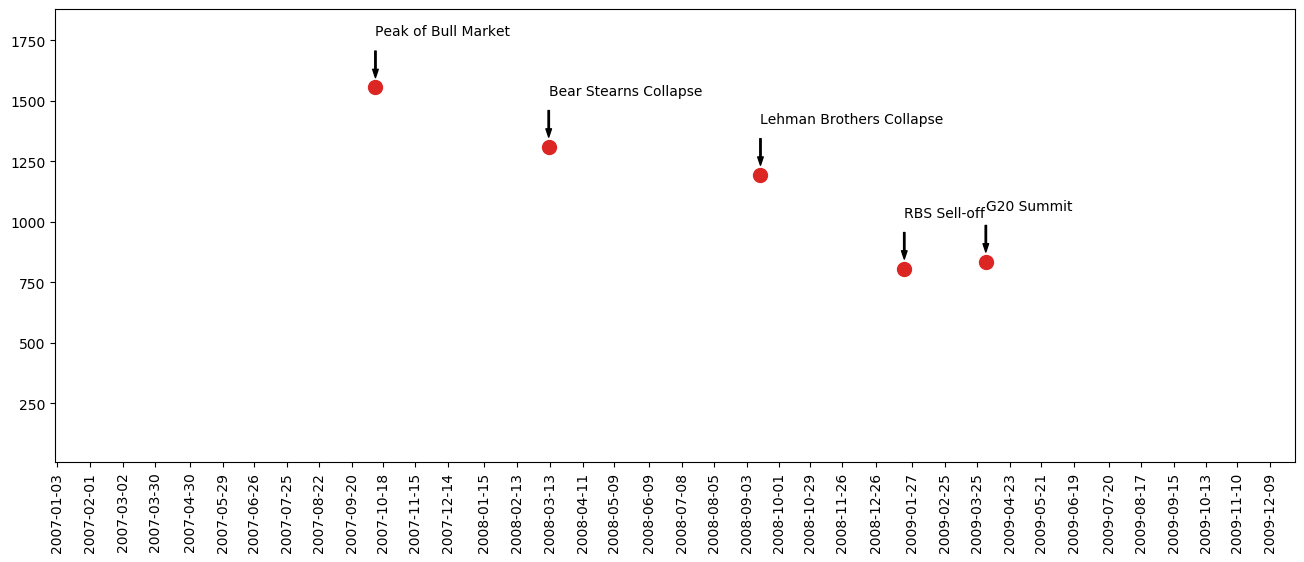

In [48]:
# need to scatter plot on existing figure
# first let's test to make sure the axis is correct

# define incidents
# a list of tuples
crisis_data = [
    (datetime(2007,10,11), 'Peak of Bull Market'),
    (datetime(2008,3,12), 'Bear Stearns Collapse'),
    (datetime(2008,9,15), 'Lehman Brothers Collapse'),
    (datetime(2009,1,20), 'RBS Sell-off'),
    (datetime(2009,4,2), 'G20 Summit')
]


fig = plt.figure( figsize=(16,6), dpi=100 )
ax = fig.add_subplot(1,1,1)

xticks = x[range(0,len(x),20)]
ax.set_xticks(xticks)
ax.set_xticklabels([i.strftime('%Y-%m-%d') for i in xticks], rotation=90)
ax.set_xlim('2007-01-01','2009-12-31')
ax.set_ylim(np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2)

for xi, label in crisis_data:
    print(xi,label)
    yi = spx.loc[xi].values
    plt.scatter(xi, yi, 100, color = r_hex)
    plt.annotate(label, # this is the text
                 (xi,yi), # this is the point to label
                 #textcoords="offset points", # how to position the text
                 xytext=(xi,yi+260), # distance from text to points (x,y)
                 arrowprops=dict(facecolor='black', headwidth=4, width=1, headlength=6, shrink=0.2),
                 ha='left',va='top') # horizontal/vertical alignment can be left, right or center
plt.show()

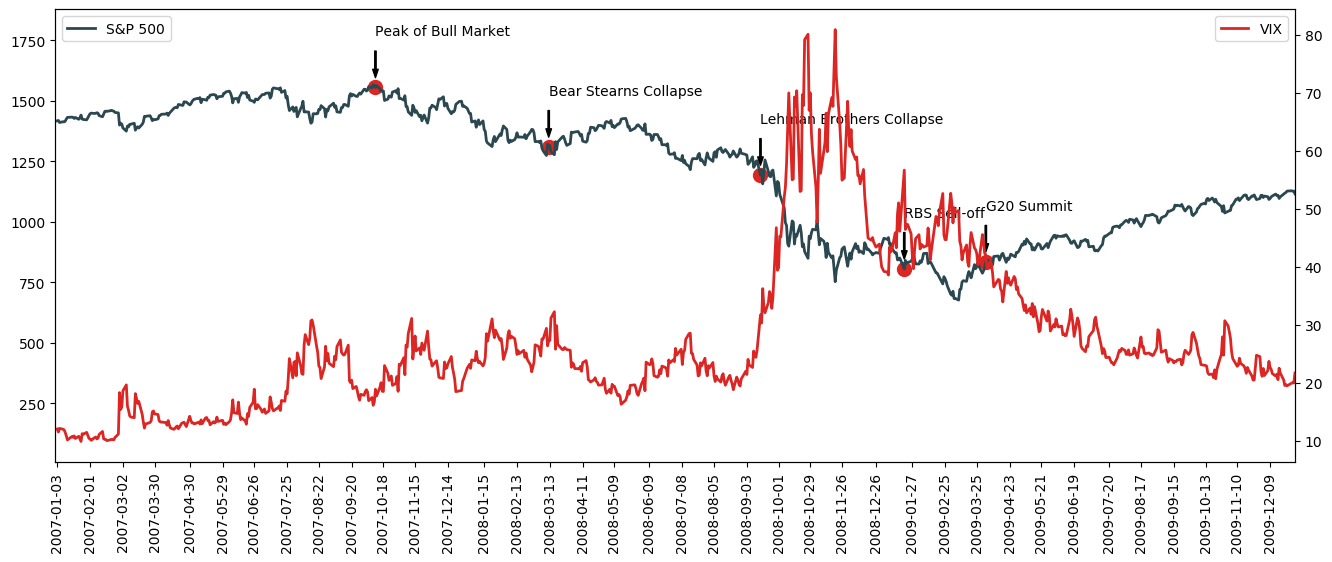

In [35]:
# Now let's combine them together

# set figure size and line style
fig = plt.figure( figsize=(16,6), dpi=100 )
ax = fig.add_subplot(1,1,1)
x = spx.index
y1 = spx.values
y2 = vix.values
# need to give plot a label in order to display legend
# ax.plot and plt.plot is exchangeable
ax.plot(x, y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P 500')


# set up x/y limit
ax.set_xlim('2007-01-01','2009-12-31')
# np.vstack stacks two ndarray vertically (recall from class 1)
ax.set_ylim(np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2)

# add legend
ax.legend(loc='upper left')



for xi, label in crisis_data:
    yi = spx.loc[xi].values
    plt.scatter(xi, yi, 100, color = r_hex)
    plt.annotate(label, # this is the text
                 (xi,yi), # this is the point to label
                 #textcoords="offset points", # how to position the text
                 xytext=(xi,yi+260), # distance from text to points (x,y)
                 arrowprops=dict(facecolor='black', headwidth=4, width=1, headlength=6, shrink=0.2),
                 ha='left',va='top') # horizontal/vertical alignment can be left, right or center



# set up another axis
ax2 = ax.twinx()
ax2.plot(x, y2, color=r_hex, linewidth=2, linestyle='-', label='VIX')
ax2.legend(loc='upper right')

# set up ticks and tick label
xticks = x[range(0,len(x),20)]
ax.set_xticks(xticks)
ax.set_xticklabels([i.strftime('%Y-%m-%d') for i in xticks], rotation=90)

plt.show()

### <font color='red'> issues: too messy with annotations </font>

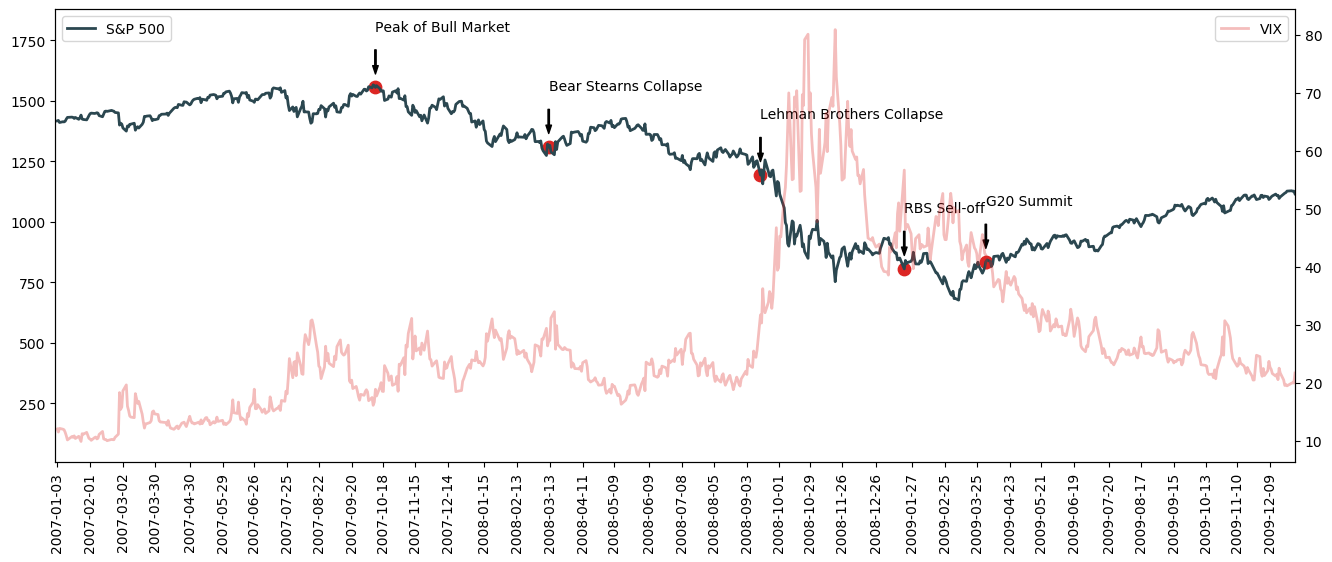

In [36]:
# make VIX plot opaque

# set figure size and line style
fig = plt.figure( figsize=(16,6), dpi=100 )
ax = fig.add_subplot(1,1,1)
x = spx.index
y1 = spx.values
y2 = vix.values
# need to give plot a label in order to display legend
# ax.plot and plt.plot is exchangeable
ax.plot(x, y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P 500')


# set up x/y limit
ax.set_xlim('2007-01-01','2009-12-31')
# np.vstack stacks two ndarray vertically (recall from class 1)
ax.set_ylim(np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2)

# add legend
ax.legend(loc='upper left')



for xi, label in crisis_data:
    yi = spx.loc[xi].values
    plt.scatter(xi, yi, 80, color = r_hex)
    plt.annotate(label, # this is the text
                 (xi,yi), # this is the point to label
                 #textcoords="offset points", # how to position the text
                 xytext=(xi,yi+280), # distance from text to points (x,y)
                 arrowprops=dict(facecolor='black', headwidth=4, width=1, headlength=6, shrink=0.25),
                 ha='left',va='top') # horizontal/vertical alignment can be left, right or center



# set up another axis
ax2 = ax.twinx()
# change VIX plot to opaque
ax2.plot(x, y2, color=r_hex, linewidth=2, linestyle='-', label='VIX', alpha = 0.3)
ax2.legend(loc='upper right')

# set up ticks and tick label
xticks = x[range(0,len(x),20)]
ax.set_xticks(xticks)
ax.set_xticklabels([i.strftime('%Y-%m-%d') for i in xticks], rotation=90)

plt.show()

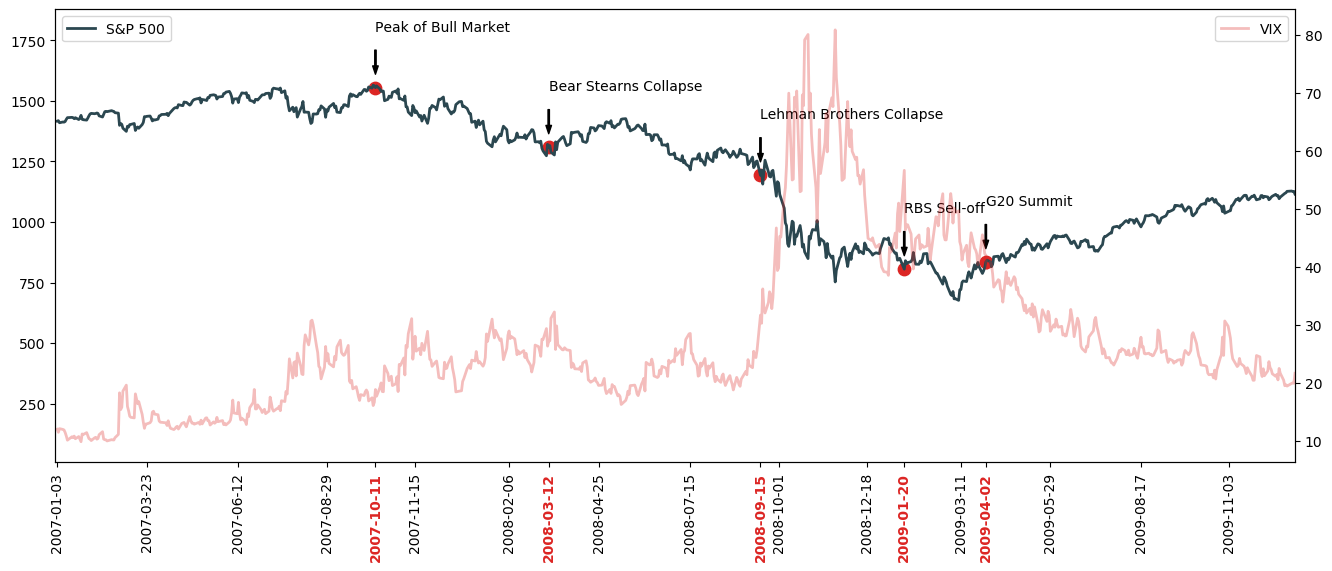

In [37]:
# add annotations' corresponding date

# set figure size and line style
fig = plt.figure( figsize=(16,6), dpi=100 )
ax = fig.add_subplot(1,1,1)
x = spx.index
y1 = spx.values
y2 = vix.values
# need to give plot a label in order to display legend
# ax.plot and plt.plot is exchangeable
ax.plot(x, y1, color=dt_hex, linewidth=2, linestyle='-', label='S&P 500')


# set up x/y limit
ax.set_xlim('2007-01-01','2009-12-31')
# np.vstack stacks two ndarray vertically (recall from class 1)
ax.set_ylim(np.vstack([y1,y2]).min()*0.8, np.vstack([y1,y2]).max()*1.2)

# add legend
ax.legend(loc='upper left')



for xi, label in crisis_data:
    yi = spx.loc[xi].values
    plt.scatter(xi, yi, 80, color = r_hex)
    plt.annotate(label, # this is the text
                 (xi,yi), # this is the point to label
                 #textcoords="offset points", # how to position the text
                 xytext=(xi,yi+280), # distance from text to points (x,y)
                 arrowprops=dict(facecolor='black', headwidth=4, width=1, headlength=6, shrink=0.25),
                 ha='left',va='top') # horizontal/vertical alignment can be left, right or center



# set up another axis
ax2 = ax.twinx()
# change VIX plot to opaque
ax2.plot(x, y2, color=r_hex, linewidth=2, linestyle='-', label='VIX', alpha = 0.3)
ax2.legend(loc='upper right')

# set up ticks and tick label
# need to store the string of dates in crisis_data
impt_tick_label = [x[0].strftime('%Y-%m-%d') for x in crisis_data]
impt_tick = pd.Index([x[0] for x in crisis_data])

# combine two index together
xticks = x[range(0,len(x),55)].union(impt_tick)
ax.set_xticks(xticks)
ax.set_xticklabels([i.strftime('%Y-%m-%d') for i in xticks], rotation=90)

for idx in ax.get_xticklabels():
    # idx is a matplotlib.text type
    if idx.get_text() in impt_tick_label:
        idx.set_color(r_hex)
        idx.set_fontweight('bold')

plt.show()

#### Other types of supported figures

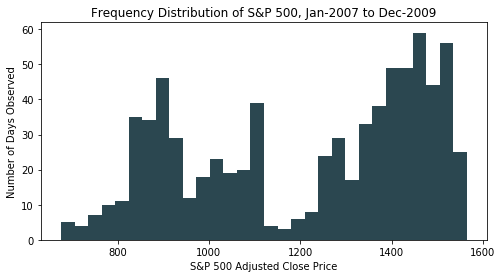

In [38]:
# check stock price (adjusted close) distribution of S&P 500
fig = plt.figure(figsize=(8,4))
plt.hist(spx.values, bins=30, color=dt_hex)
plt.xlabel('S&P 500 Adjusted Close Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of S&P 500, Jan-2007 to Dec-2009')
plt.show()

In [39]:
# scatter plot
#sp['Year']
nsp = sp.reset_index()
nsp['Year'] = nsp['Date'].map(lambda x: x.strftime('%Y'))
avg_vol = nsp.groupby('Year')['Volume'].mean()
avg_price = nsp.groupby('Year')['Adj Close'].mean()

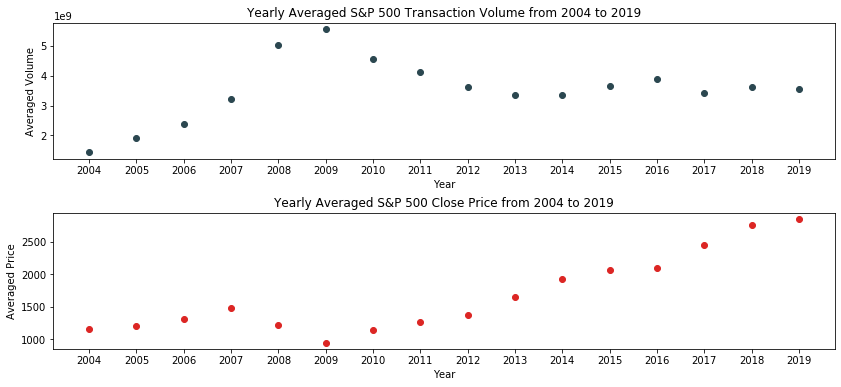

In [40]:
# trend of volume and price for s&p 500 yearly
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(14,6))
axes[0].scatter(avg_vol.index, avg_vol.values, color=dt_hex)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Averaged Volume')
axes[0].set_title('Yearly Averaged S&P 500 Transaction Volume from 2004 to 2019')

axes[1].scatter(avg_price.index, avg_price.values, color=r_hex)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Averaged Price')
axes[1].set_title('Yearly Averaged S&P 500 Close Price from 2004 to 2019')

plt.subplots_adjust(hspace=0.4)

plt.show()

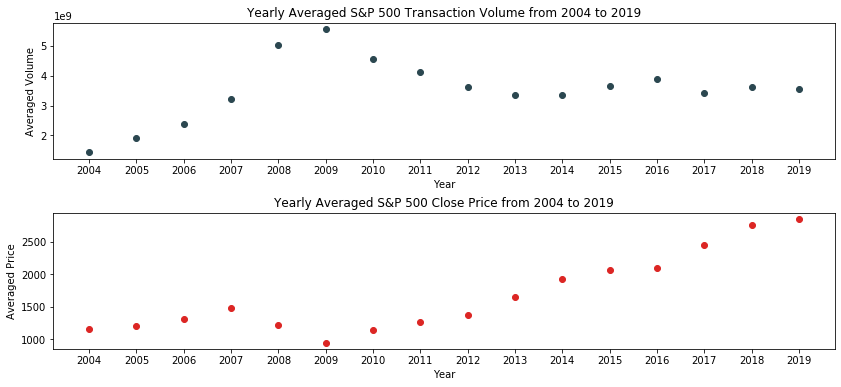

In [41]:
# trend of volume and price for s&p 500 yearly
# use resample instead of group by

rsp = sp.resample('Y',kind='period').mean()
avg_vol = rsp['Volume']
avg_price = rsp['Adj Close']


fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(14,6))
axes[0].scatter(avg_vol.index.astype(str), avg_vol.values, color=dt_hex)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Averaged Volume')
axes[0].set_title('Yearly Averaged S&P 500 Transaction Volume from 2004 to 2019')

axes[1].scatter(avg_price.index.astype(str), avg_price.values, color=r_hex)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Averaged Price')
axes[1].set_title('Yearly Averaged S&P 500 Close Price from 2004 to 2019')

plt.subplots_adjust(hspace=0.4)

plt.show()


###### Pie Chart

In [42]:
# Pie chart
# load 1Y stock data
stock = pd.read_csv('1Y_Stock_Data.csv')
stock.sort_values('Symbol',inplace=True)
stock.tail()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
665,15/10/2018,JD,24.110001,24.639999,23.799999,24.139999,24.139999,11138200
664,12/10/2018,JD,24.540001,24.900000,23.740000,24.450001,24.450001,20258500
663,11/10/2018,JD,22.520000,23.660000,22.500000,23.480000,23.480000,25140000
676,30/10/2018,JD,22.070000,22.469999,21.700001,22.379999,22.379999,12069100
629,23/08/2018,JD,32.740002,33.049999,31.129999,31.389999,31.389999,23523300


In [43]:
# how many stocks are there
stock.Symbol.unique()

array(['AAPL', 'BABA', 'FB', 'GS', 'JD'], dtype=object)

In [47]:
# calculate stock price on 26/02/2019
stock_list = ['AAPL', 'BABA', 'FB', 'GS', 'JD']
share = np.array([100,20,50,10,50])

# assume a portfolio with share listed below on these 5 stocks 
price = stock.loc[(stock.Date=='26/02/2019'), 'Adj Close']


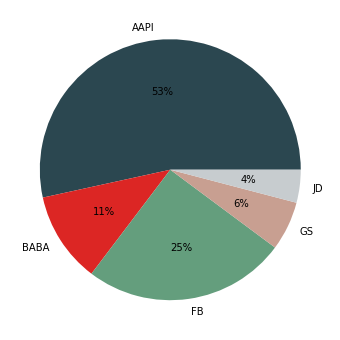

In [46]:
total = np.array(price.values) * share
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,1,1)
ax.pie(total, labels=stock_list, colors=[dt_hex,r_hex,g_hex,tn_hex,g25_hex], autopct='%.0f%%')
plt.show()

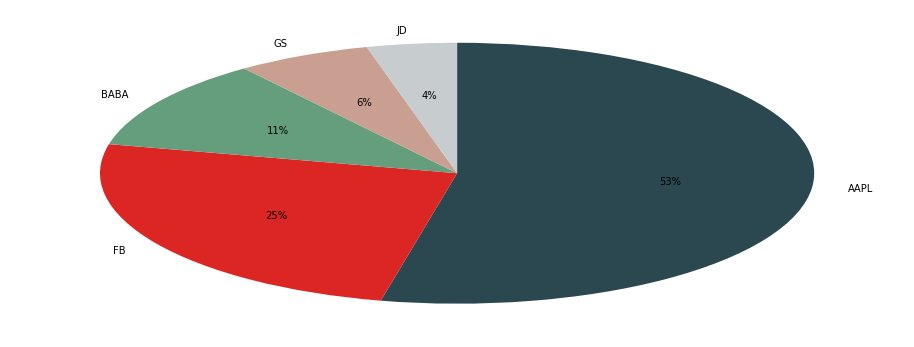

In [178]:
# let's reorder it, put majority to right-hand side and order in clock-wise
idx = total.argsort()[::-1]
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,1,1)
ax.pie(total[idx], labels=[stock_list[i] for i in idx], 
       colors=[dt_hex,r_hex,g_hex,tn_hex,g25_hex], 
       startangle=90, counterclock=False,
       autopct='%.0f%%')
plt.show()

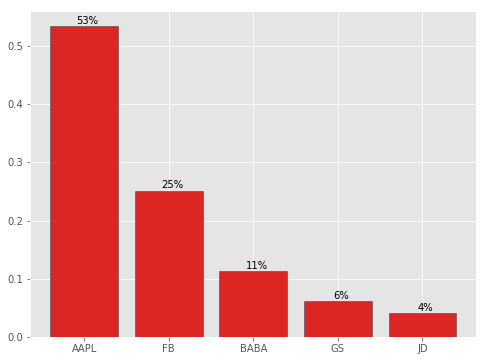

In [179]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
total_ordered = total[idx]
pct = total_ordered/np.sum(total_ordered)
stock_list_ordered = [stock_list[i] for i in idx]
xticks = np.arange(len(pct))
ax.bar(xticks, pct, facecolor=r_hex, edgecolor=dt_hex)
ax.set_xticks(xticks)
ax.set_xticklabels(stock_list_ordered)

for x,y in zip(xticks,pct):
    ax.text(x+0.04, y+0.05/100, '{0:.0%}'.format(y), ha='center', va='bottom')
plt.show()

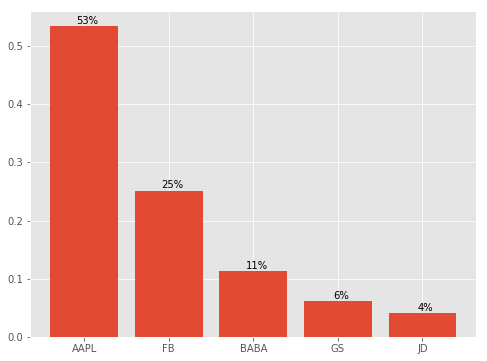

In [180]:
# adot ggplot style
plt.style.use('ggplot')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
total_ordered = total[idx]
pct = total_ordered/np.sum(total_ordered)
stock_list_ordered = [stock_list[i] for i in idx]
xticks = np.arange(len(pct))
ax.bar(xticks, pct)
ax.set_xticks(xticks)
ax.set_xticklabels(stock_list_ordered)

for x,y in zip(xticks,pct):
    ax.text(x+0.04, y+0.05/100, '{0:.0%}'.format(y), ha='center', va='bottom')
plt.show()

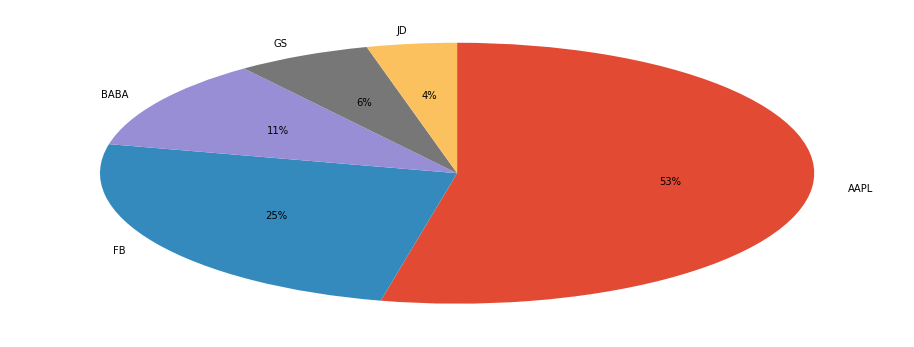

In [181]:
# adot ggplot style
plt.style.use('ggplot')

idx = total.argsort()[::-1]
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,1,1)
ax.pie(total[idx], labels=[stock_list[i] for i in idx], 
       startangle=90, counterclock=False,
       autopct='%.0f%%')
plt.show()